In [ ]:
import sys
sys.path.append('..')
from utils.pytorch_helper import *
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader

model_type = "resnet50" # backbone

model = fasterrcnn_resnet50_fpn_v2(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

checkpoint = torch.load(f"../../models/best_fasterrcnn_{model_type}.pth")
model.load_state_dict(checkpoint["model_state_dict"])
print(f"Model loaded!")

Model loaded!


In [2]:
# Train Dataset
images_dir = "../../data/merged/images/test"
annotations_dir = "../../data/merged/labels/test"
test_dataset = LicensePlateDataset(images_dir, annotations_dir)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

In [3]:
all_imges = []
all_bboxes = []
for images, targets in test_loader:
    all_imges.extend([img.to(device) for img in images])
    all_bboxes.extend([target["boxes"].cpu().numpy().tolist() for target in targets])
    
evaluator = ObjectDetectionEvaluator(model, all_imges, all_bboxes, fasterrcnn_predict)
evaluator.get_metric_summary(verbose=False)

Processing images: 100%|██████████| 399/399 [00:45<00:00,  8.80it/s]


{'Box(Precision)': 0.765451663904049,
 'Box(Recall)': 0.919999999824762,
 'Confusion Matrix': {'TP': 483, 'FP': 148, 'FN': 42, 'TN': None},
 'mAP': [(50, 0.9706119298934937),
  (55, 0.9688334465026855),
  (60, 0.9668923616409302),
  (65, 0.9598644375801086),
  (70, 0.9538735747337341),
  (75, 0.9360708594322205),
  (80, 0.8866869211196899),
  (85, 0.7479524612426758),
  (90, 0.3479233682155609),
  (95, 0.05363491177558899)],
 'mAP50': 0.9706119298934937,
 'mAP50-95': np.float64(0.7792344272136689)}

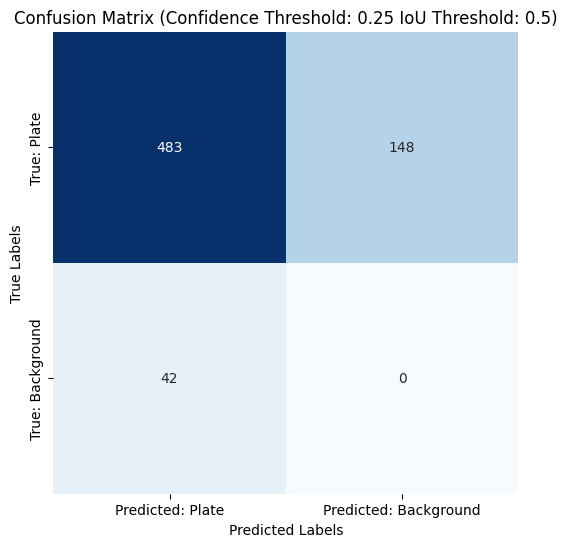

In [4]:
evaluator.visualize_confusion_matrix()

Precision calculation not possible at confidence ge: 1.0


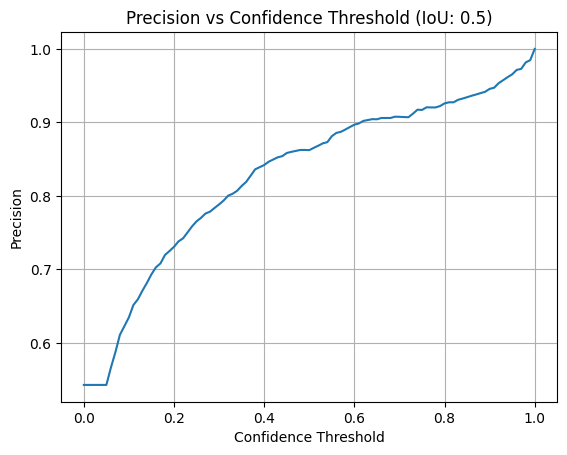

In [5]:
evaluator.visualize_precision_confidence_curve()

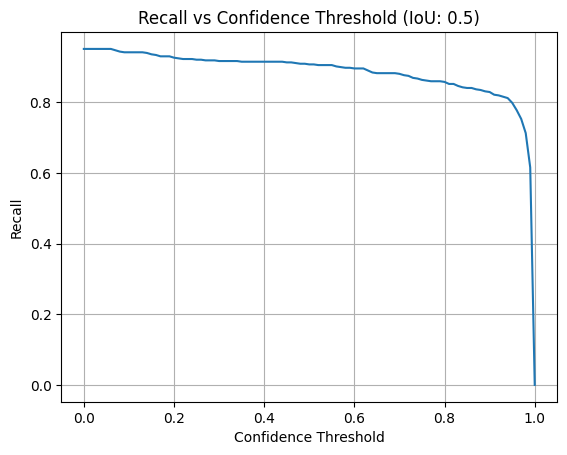

In [6]:
evaluator.visualize_recall_confidence_curve()

Precision calculation not possible at confidence ge: 1.0


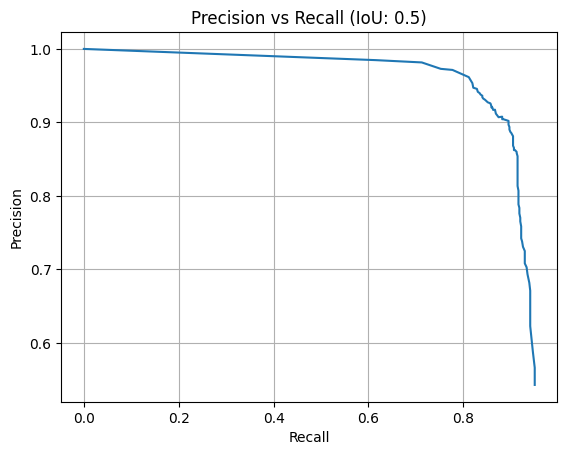

In [7]:
evaluator.visualize_precision_recall_curve()

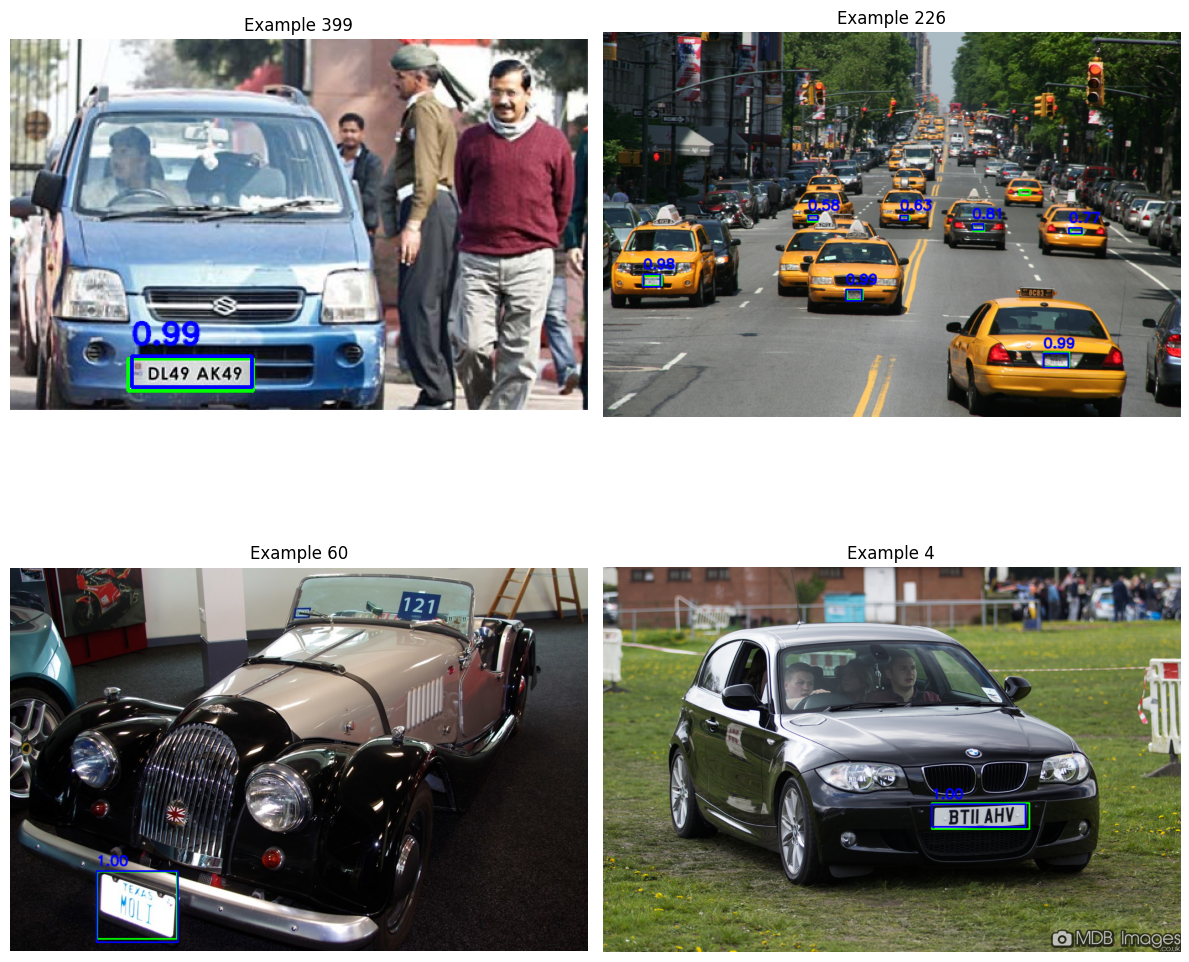

In [8]:
evaluator.visualize_for_examples()

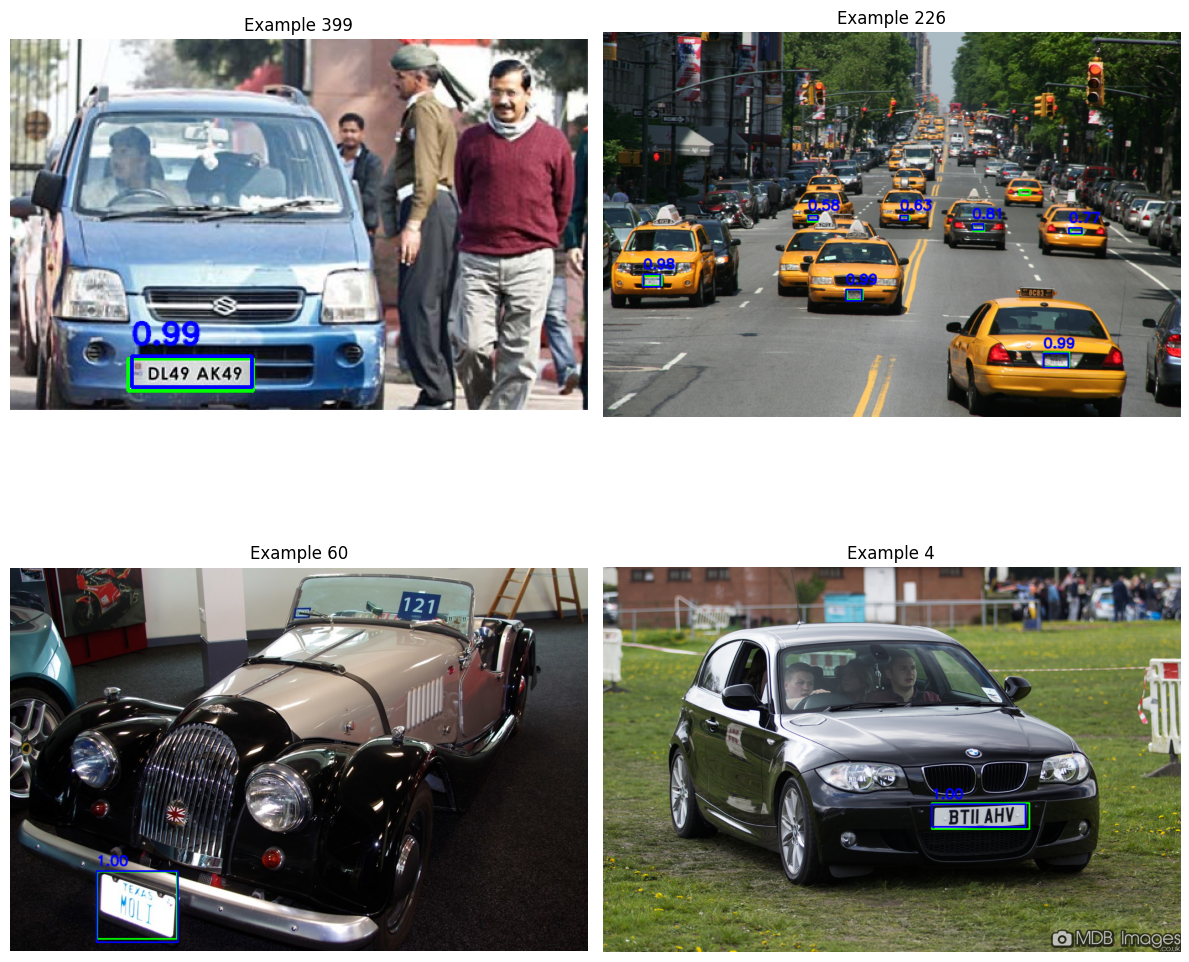

In [9]:
evaluator.visualize_for_examples(conf_threshold=0.01, iou_threshold=0.5)